# B sensitivity test
Here we check how the B parameter of Holland (1980) changes across all the different TCs that we have in the dataset. To do so, we first sort the TCs by category. Second, we define a piecewise B: B1 for the inner-core, B2 for the region right after the eyewall and B3 for the outer region. Then, we check how B1, B2 and B3 are modified as a function of the generak shape of the TC (asymmetry, presence of certain rainbands, etc...). 

The radii R1 and R2 corresponding to the 3 pieces on which the profile is defined are computed as Rmax for R1 and then a cubic fraction of Rmax for R2.

When we allowed A to vary, the piecewise fitting had a larger RMSE than the Holland fitting, and the piecewise profile was really bad for a significant part of the TCs. It's even worse when A is fixed. 

Clearly, the way we define Rfit will be crucial. Maybe we should also test with only 2 pieces (at Rmax, or Rmerge from Chavas). We can also use Rmerge from Chavas as R2. 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
from scipy.optimize import curve_fit

import glob

import functions_test as f

In [2]:
### PATHS
dir_path = '/home/arthur/data/cyclobs/rotated_files/'
all_data = glob.glob(dir_path + "*.nc")
print("Total number of files:", len(all_data))
# Categories: 'dep', 'storm', 'cat-1', 'cat-2', 'cat-3', 'cat-4', 'cat-5'
# Nb of TCs:    1,      139,     88,      44,      57,      37,      19

### PARAMS
PARAMS = {
    'print_params_values': False
    }

Total number of files: 385


In [3]:
### INITIALIZE DATA STRUCTURE
INI = {           # Initial values
    'Holland':   [], # Lat, pn, pc, Vmin, Rmax, Vmax
    'B_sens':    [], # rho, Lat, pn, pc, R1, R2, V1, V2, Vmin, A, B
    'Chavas':    []  # Vmax, Rfit, Vfit, fcor, Cdvary, Cd, w_cool, CkCdvary, CkCd, eye_adj, alpha_eye
    } 
FIT = {           # Fit values
    'Holland':   [], # Lat, pn, pc, Vmin, Rmax, Vmax
    'B_sens':    [], # pn, pc, Vmin, A, B0, B1, B2
    'Chavas':    []  # rr, VV, rmax, r0, rmerge, Vmerge
    } 

36 =>     /home/arthur/data/cyclobs/rotated_files/s1b-iw-owi-cm-20201031t212858-20201031t213128-000003-02DBDB_ll_gd_rotated.nc
37 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20150515t083749-20150515t083905-00003-E0BD9_ll_gd_rotated.nc
38 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20180823t043704-20180823t043913-000003-028AD1_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


39 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20200516t232006-20200516t232121-000003-03C684_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


40 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20180807t154512-20180807t154628-00003-07134_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


41 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20150801t072303-20150801t072419-00003-E0BEB_ll_gd_rotated.nc
42 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20180818t080233-20180818t080350-00003-0EA59_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


43 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20141103t131130-20141103t131246-00003-E41DD_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


44 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20171021t092057-20171021t092213-00003-BDC95_ll_gd_rotated.nc
45 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20150602t135643-20150602t135759-00003-2B6FE_ll_gd_rotated.nc
46 =>     /home/arthur/data/cyclobs/rotated_files/s1b-iw-owi-cm-20191119t095826-20191119t095943-000003-023D71_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


47 =>     /home/arthur/data/cyclobs/rotated_files/s1b-iw-owi-cm-20191012t084028-20191012t084212-000003-022BD1_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


48 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20180825t163219-20180825t163334-000003-028C00_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


49 =>     /home/arthur/data/cyclobs/rotated_files/s1a-ew-owi-cm-20190227t204007-20190227t204132-000003-02EA0C_ll_gd_rotated.nc
50 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20150902t201620-20150902t201736-00003-E0BF3_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


51 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20170918t095058-20170918t095152-000003-01F075_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


52 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20150829t034258-20150829t034658-00003-68AC9_ll_gd_rotated.nc
53 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20170730t080121-20170730t080401-00003-BDC5F_ll_gd_rotated.nc
54 =>     /home/arthur/data/cyclobs/rotated_files/s1a-ew-owi-cm-20191207t023226-20191207t023357-000003-0374DF_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


55 =>     /home/arthur/data/cyclobs/rotated_files/s1b-ew-owi-cm-20201225t014342-20201225t014552-000003-02F4F5_ll_gd_rotated.nc
56 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20150801t194958-20150801t195113-00003-562DD_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


57 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20150827t170957-20150827t171231-00003-68AD9_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


58 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20170918t221759-20170918t222029-000003-01F0A9_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


59 =>     /home/arthur/data/cyclobs/rotated_files/s1a-ew-owi-cm-20180928t093504-20180928t093708-000003-029BC7_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


60 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20180806t011151-20180806t011245-000003-0282CD_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)
/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


61 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20180316t204737-20180316t204852-000003-024251_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)
/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


62 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20170802t185532-20170802t185648-00003-0B25E_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)
/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


63 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20180206t131732-20180206t132210-00003-873F3_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


64 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20201009t120643-20201009t120826-000003-040B68_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)
/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


65 =>     /home/arthur/data/cyclobs/rotated_files/s1b-iw-owi-cm-20171015t184330-20171015t184511-000003-00DD96_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


66 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20140803t143514-20140803t143630-00003-E41BC_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


67 =>     /home/arthur/data/cyclobs/rotated_files/s1b-ew-owi-cm-20180201t002120-20180201t002425-000003-010EF2_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


68 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20190920t130548-20190920t130734-000003-034DBE_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)
/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


69 =>     /home/arthur/data/cyclobs/rotated_files/s1a-ew-owi-cm-20200316t020118-20200316t020322-000003-03A788_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


70 =>     /home/arthur/data/cyclobs/rotated_files/s1a-ew-owi-cm-20160826t211505-20160826t211809-000003-01420D_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


71 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20190809t100111-20190809t100316-000003-033873_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)
/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


72 =>     /home/arthur/data/cyclobs/rotated_files/s1a-ew-owi-cm-20201027t103902-20201027t104036-000003-04147D_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)
/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


73 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20150510t215025-20150510t215141-00003-BDBE0_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)
/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


74 =>     /home/arthur/data/cyclobs/rotated_files/s1b-ew-owi-cm-20180810t165606-20180810t165822-000003-0167B7_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


75 =>     /home/arthur/data/cyclobs/rotated_files/s1a-ew-owi-cm-20181013t071546-20181013t071851-000003-02A2E9_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


76 =>     /home/arthur/data/cyclobs/rotated_files/s1b-ew-owi-cm-20181004t093407-20181004t093712-000003-018034_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


77 =>     /home/arthur/data/cyclobs/rotated_files/rs2--owi-cm-20140703t111356-20140703t111450-00003-E41BB_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)
/home/arthur/scripts/windProfiles/symmetric/functions_test.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 8))


78 =>     /home/arthur/data/cyclobs/rotated_files/s1a-iw-owi-cm-20190914t231126-20190914t231306-000003-034AF8_ll_gd_rotated.nc


/home/arthur/scripts/windProfiles/symmetric/functions_test.py:586: RuntimeWarning: Mean of empty slice
  spdm   = np.nanmean(spd, axis=0)


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

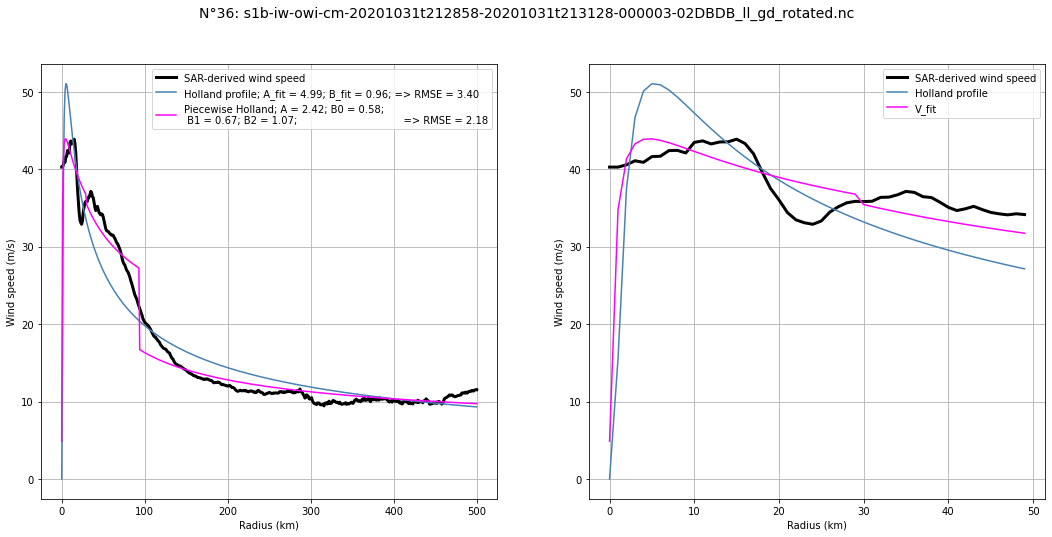

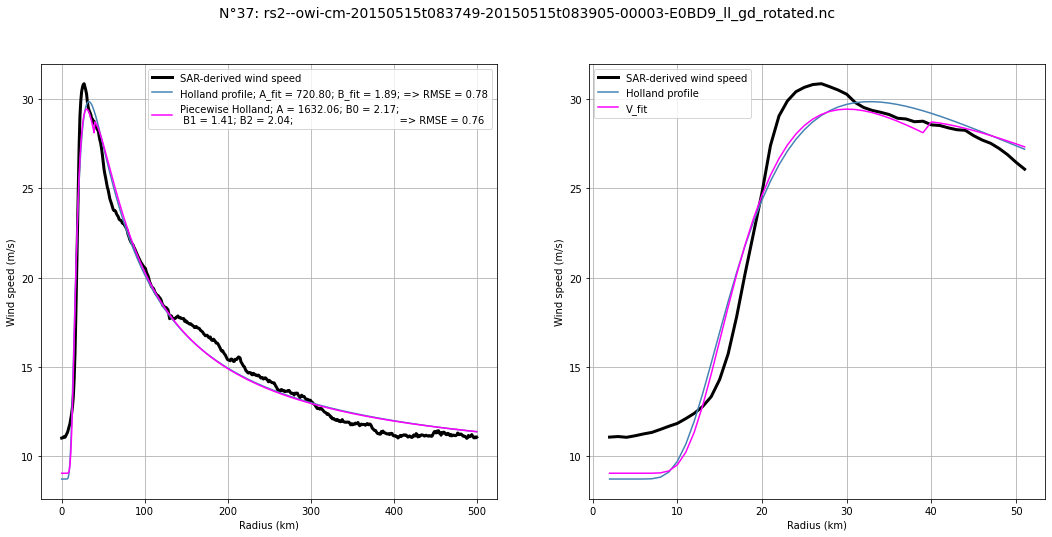

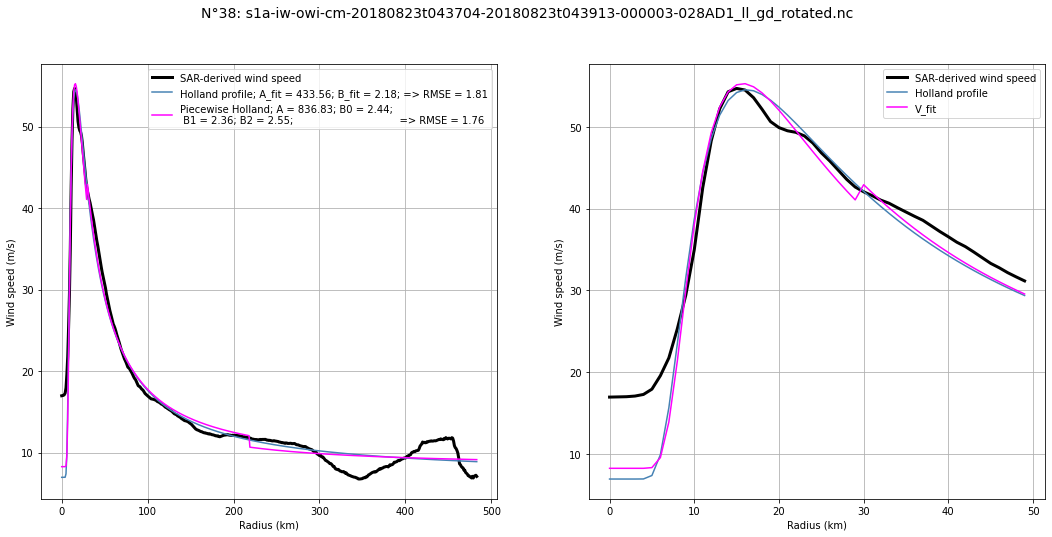

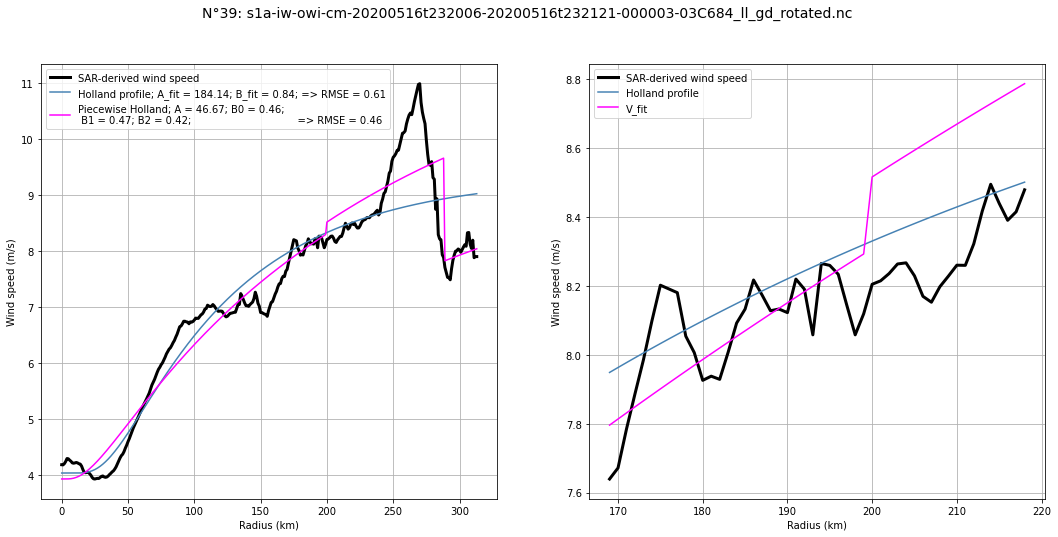

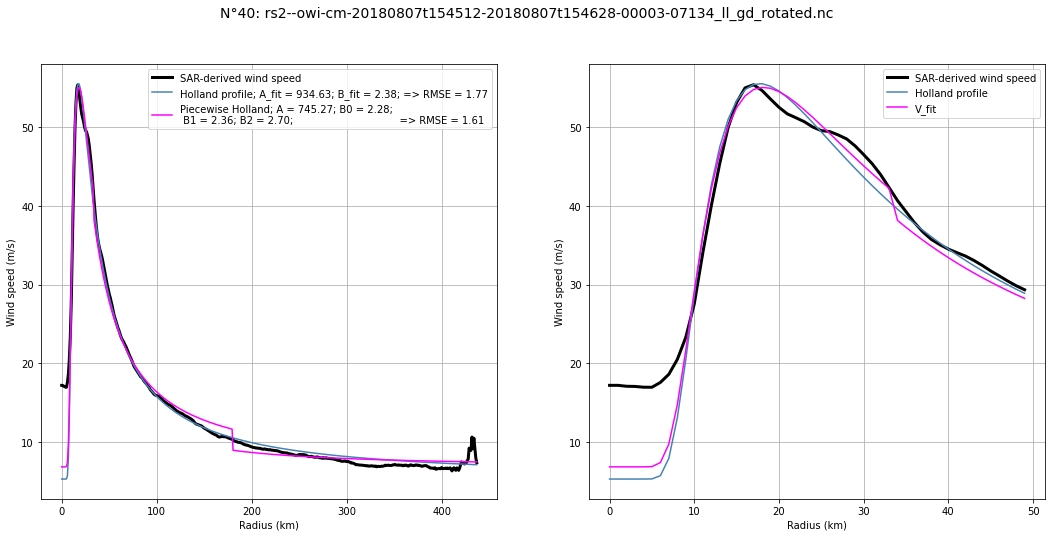

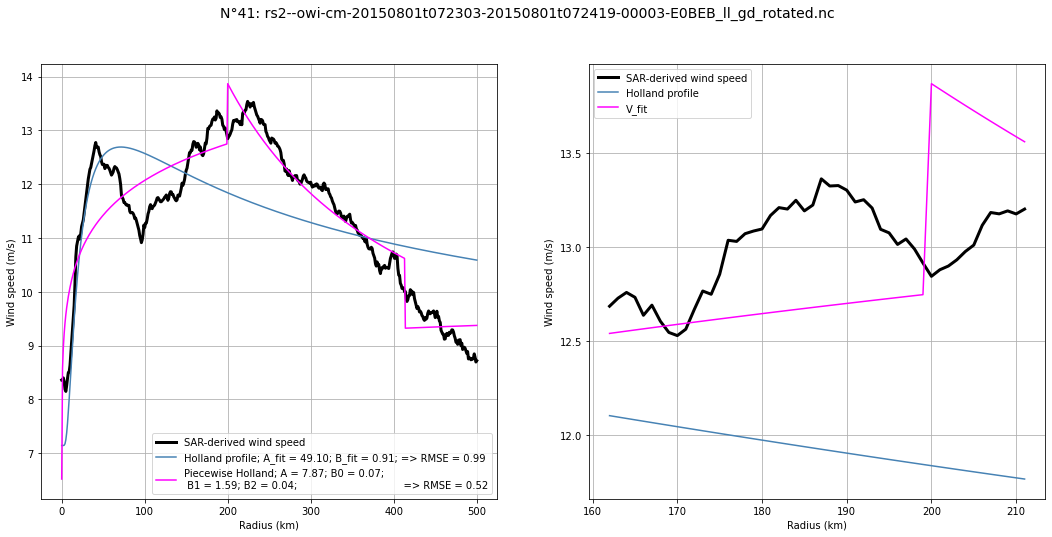

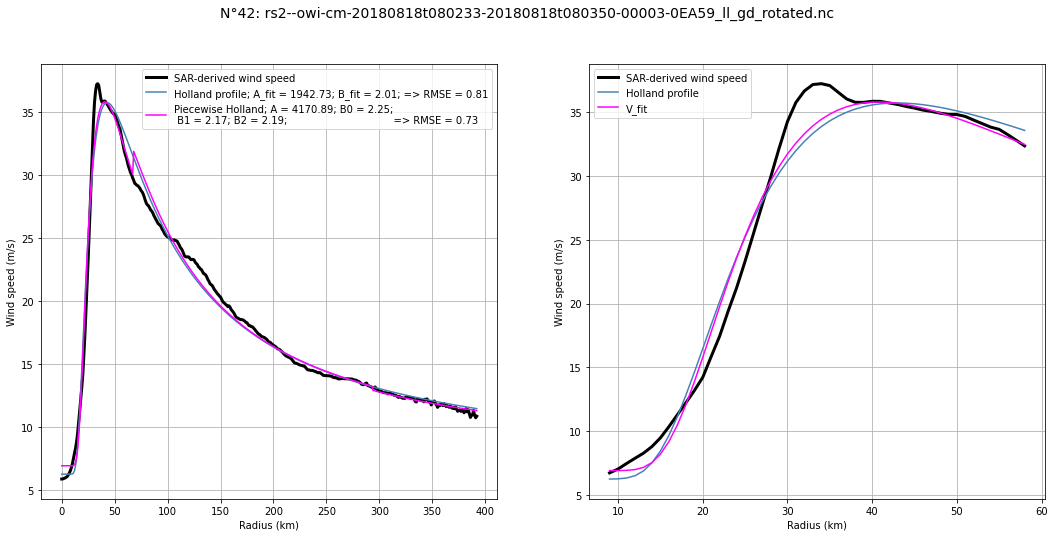

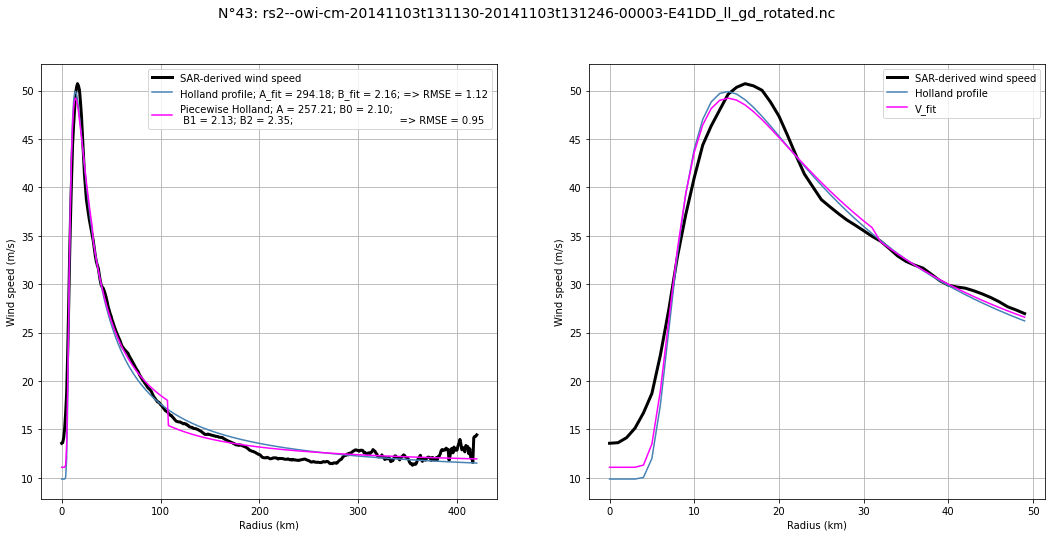

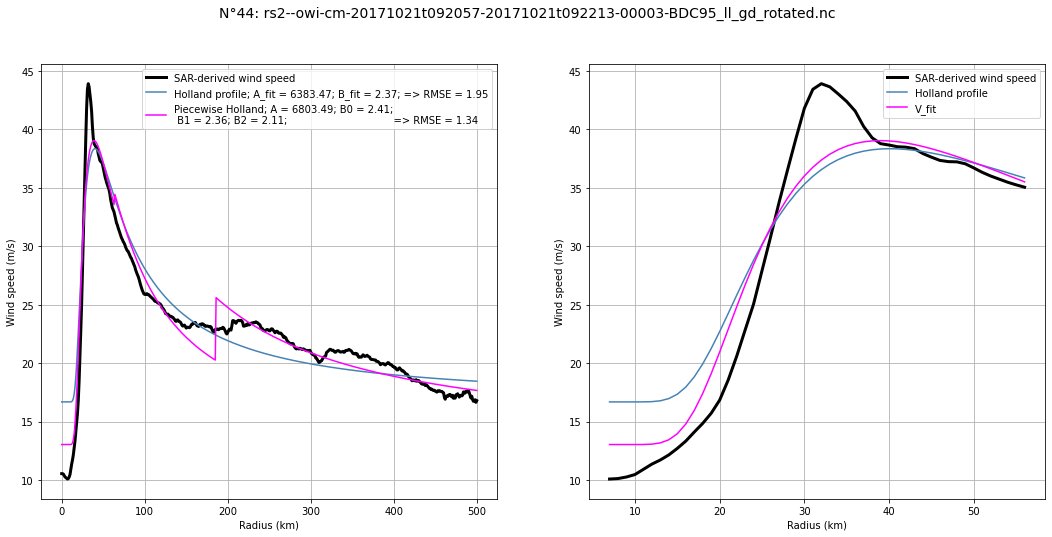

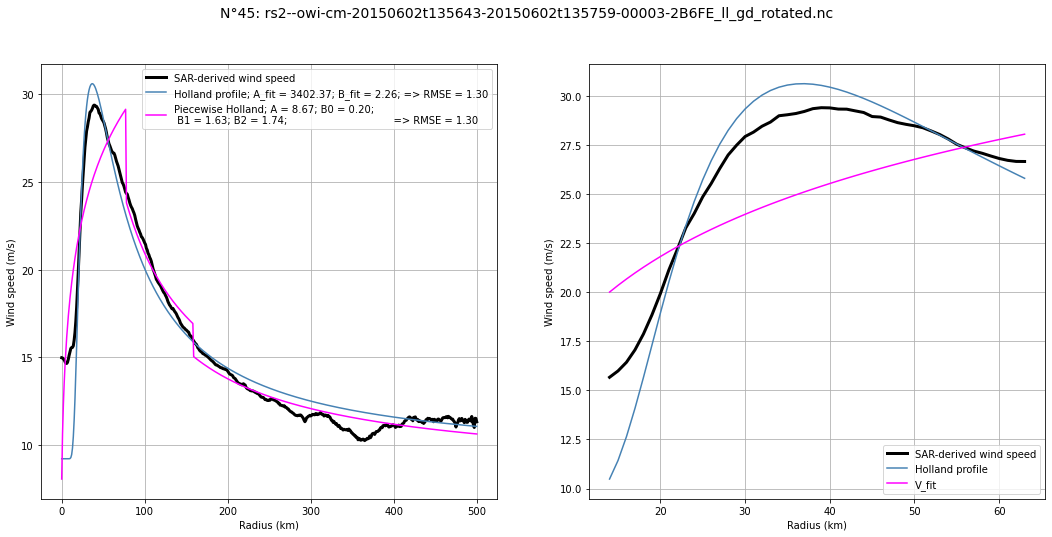

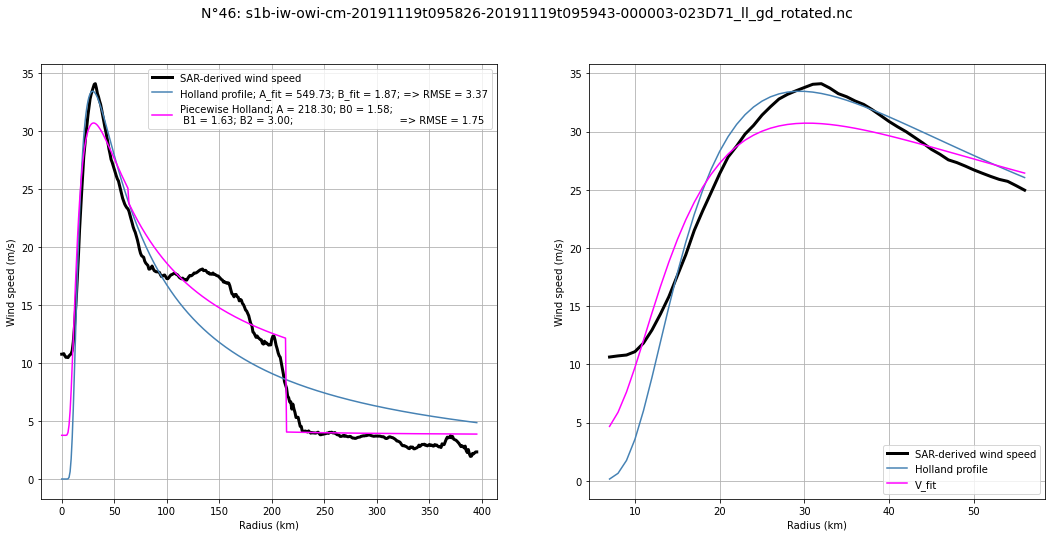

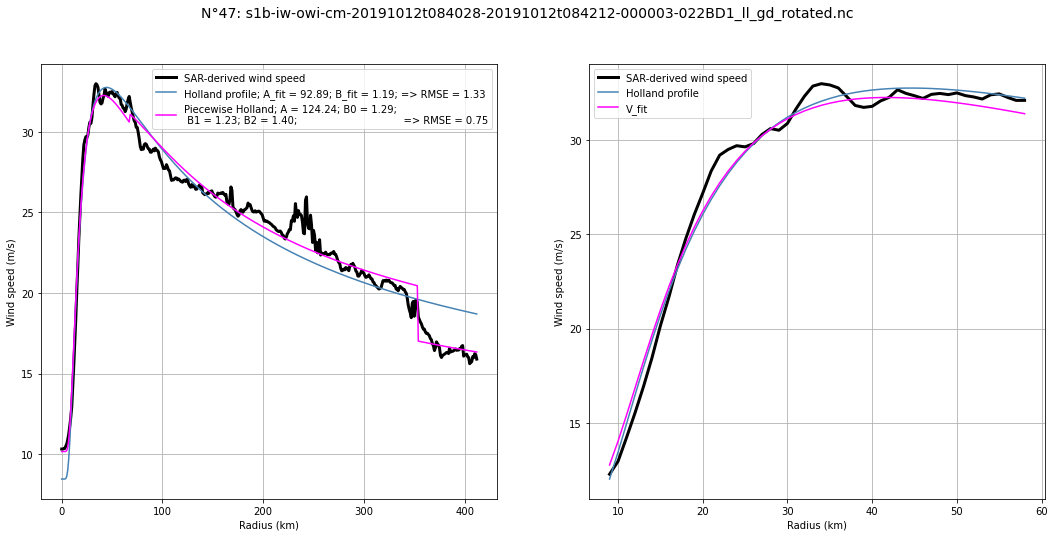

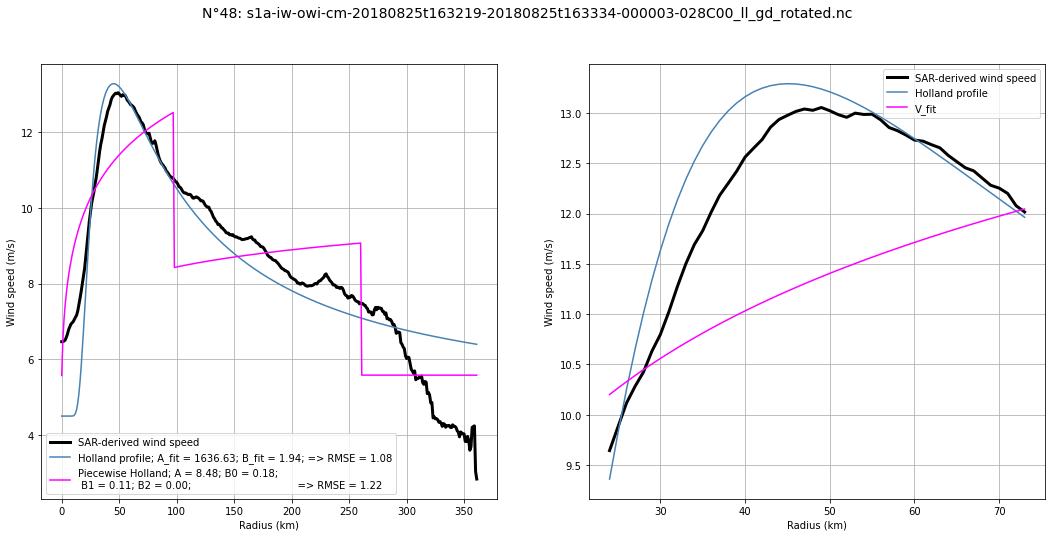

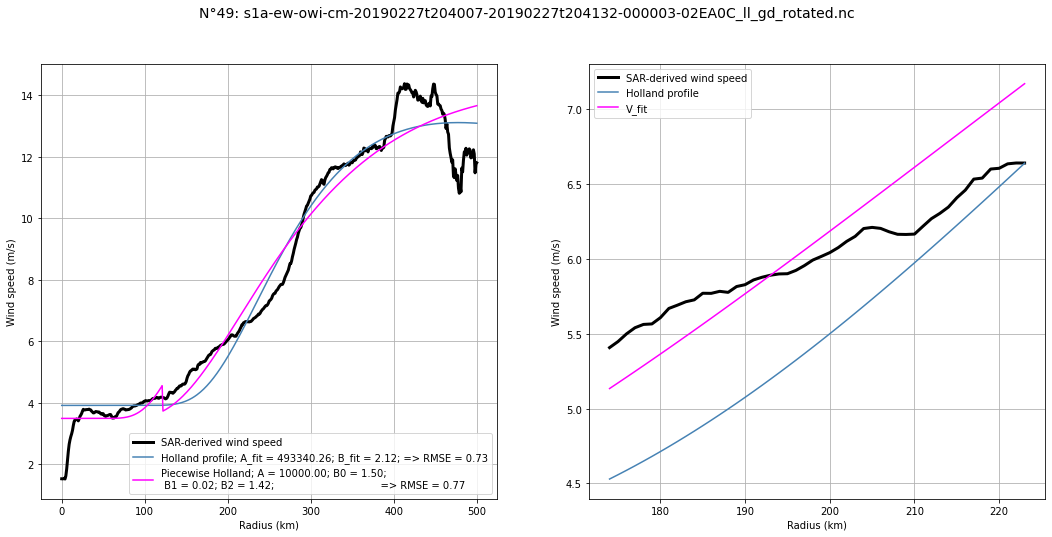

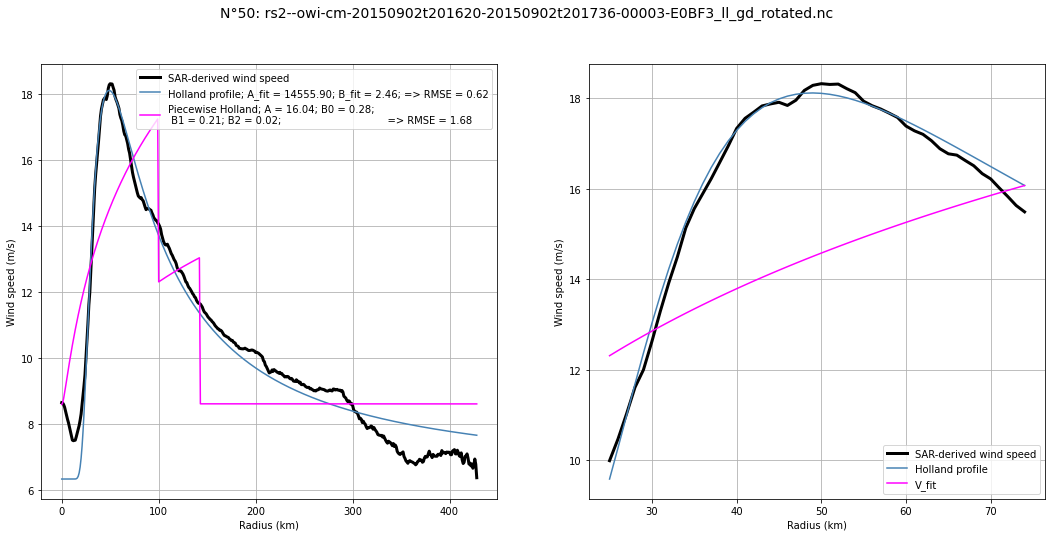

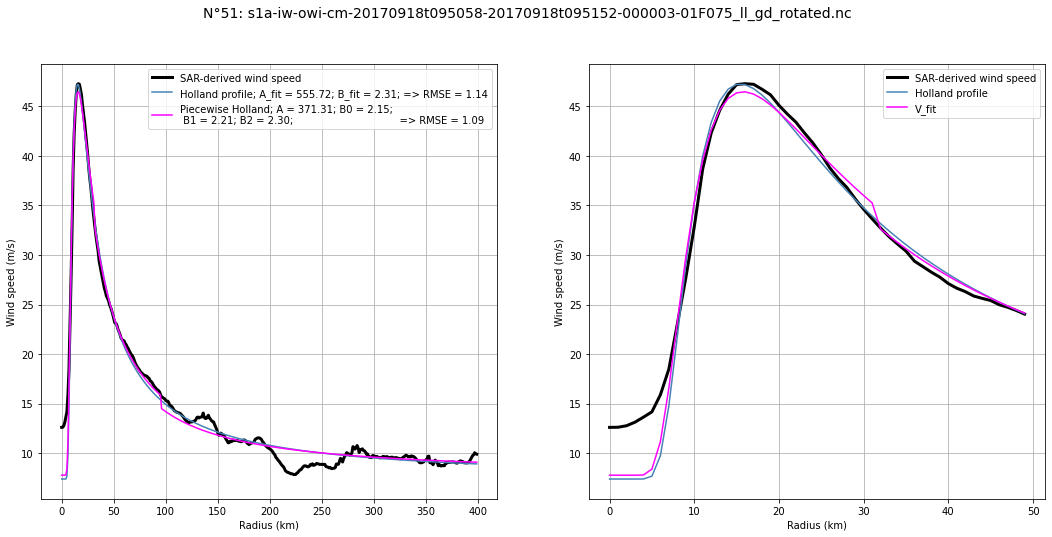

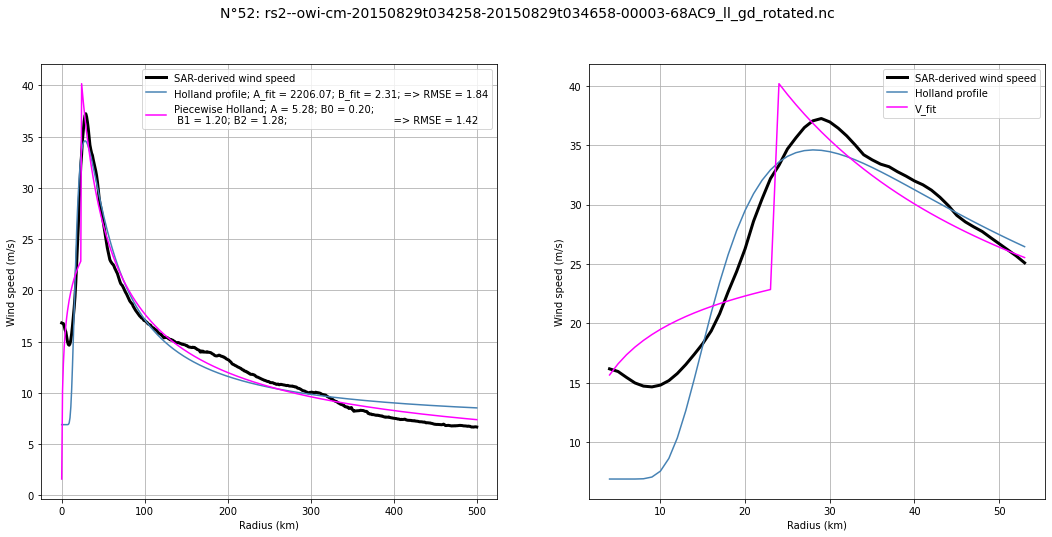

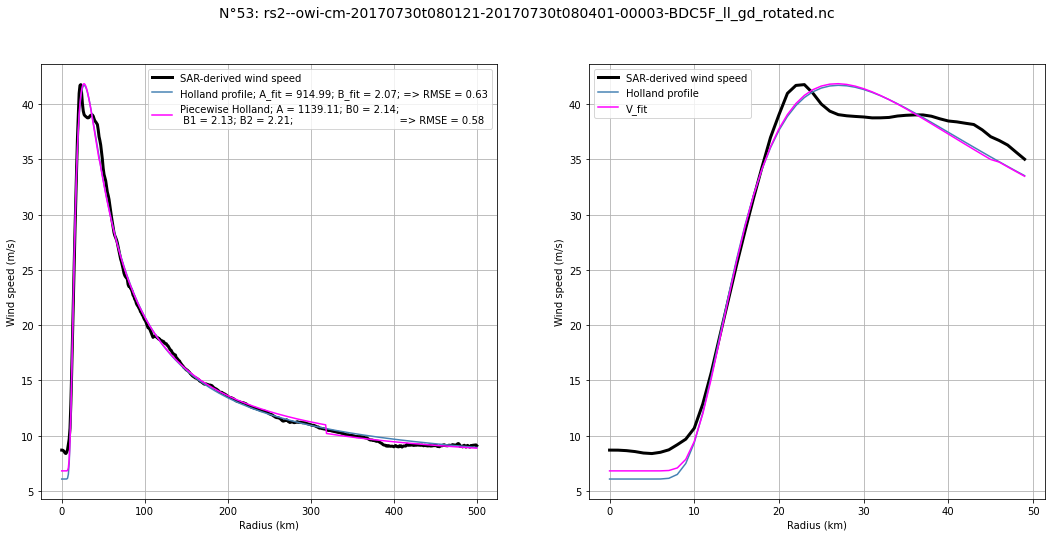

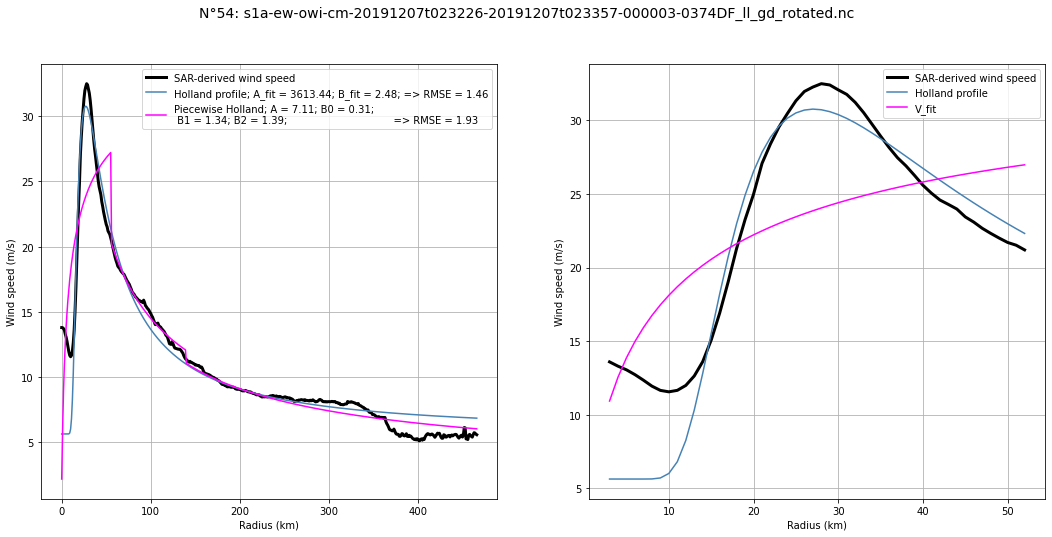

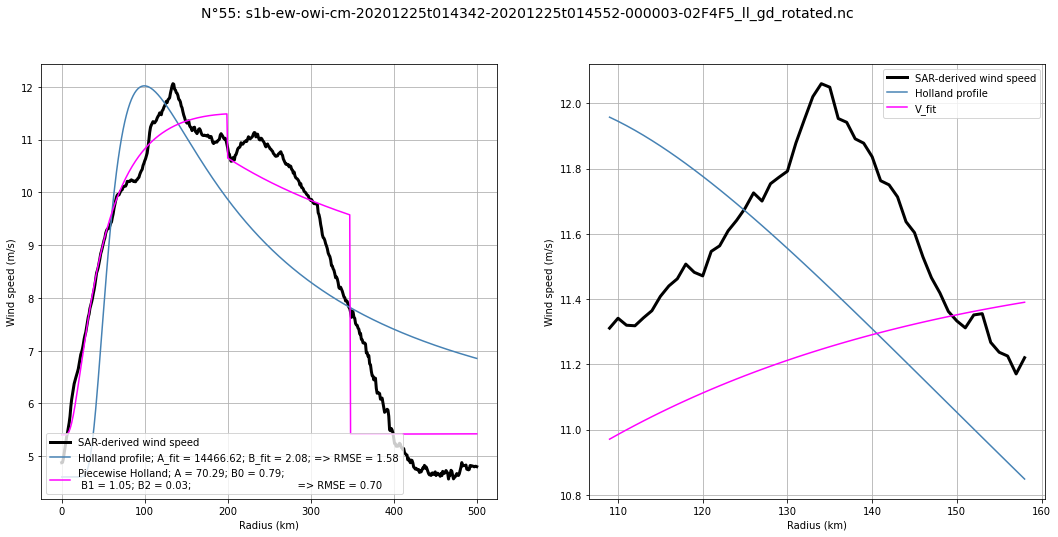

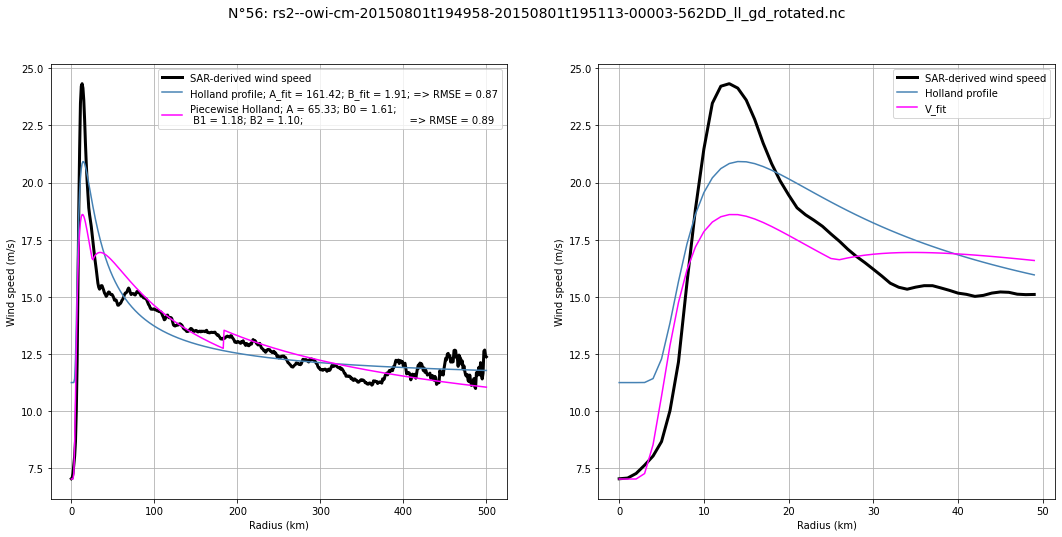

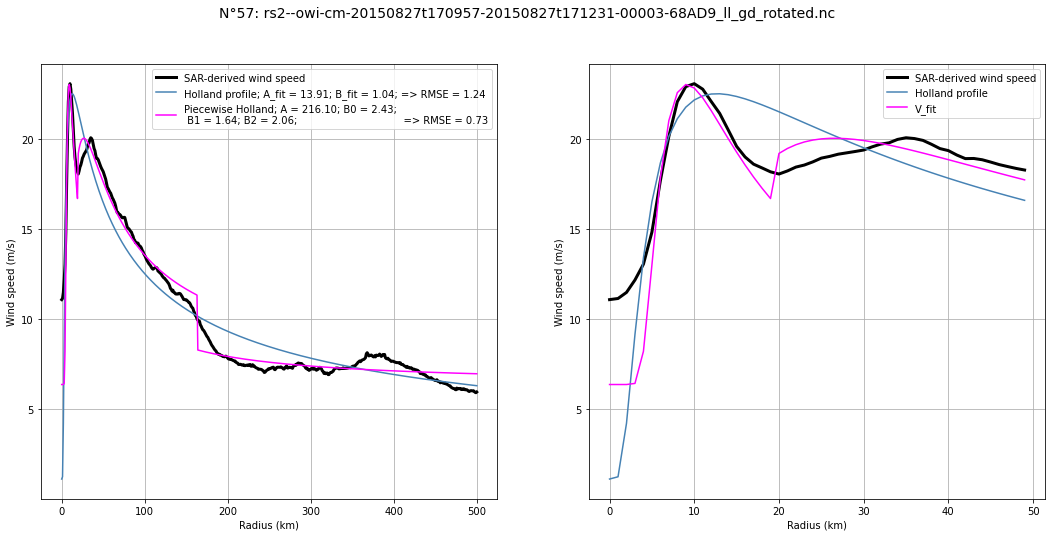

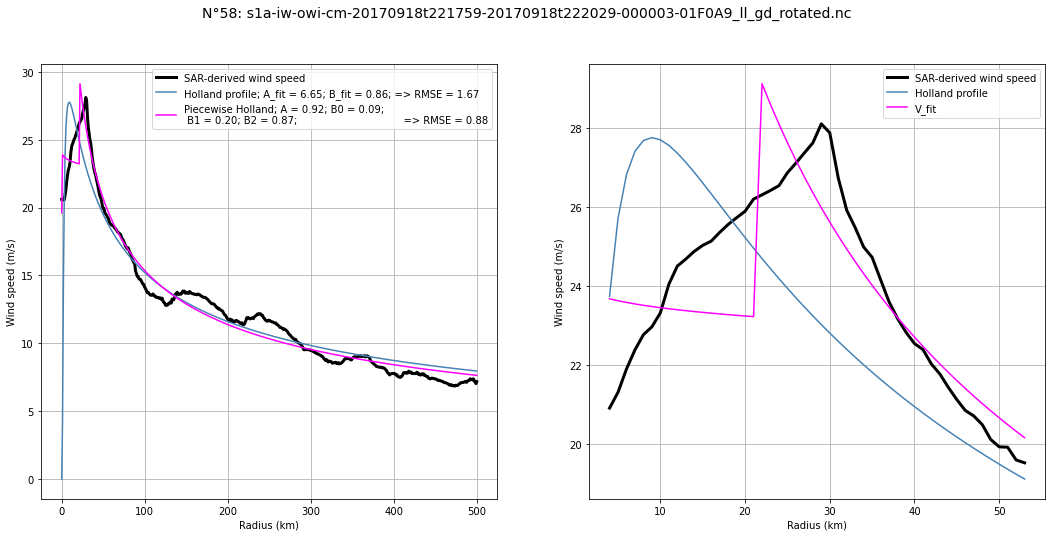

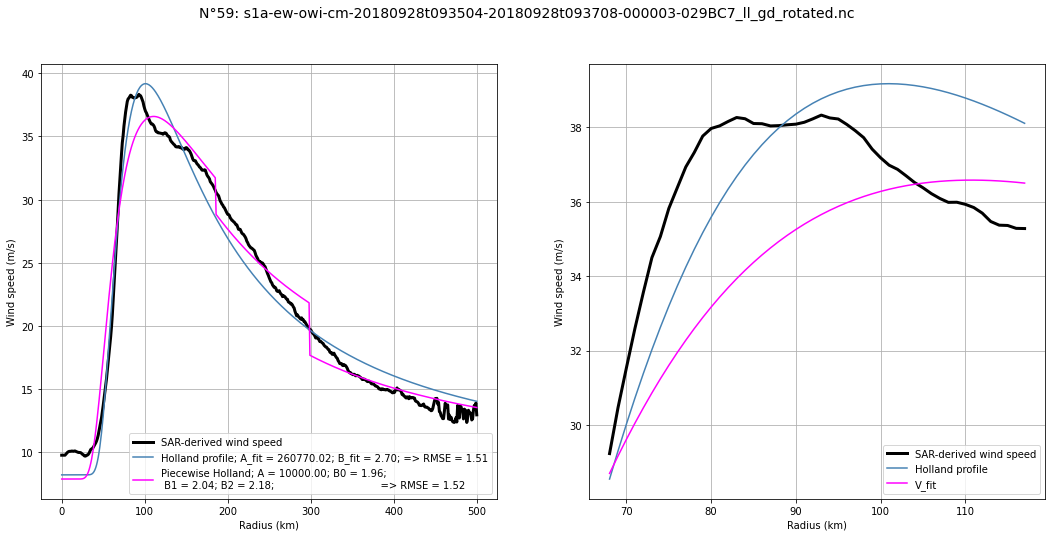

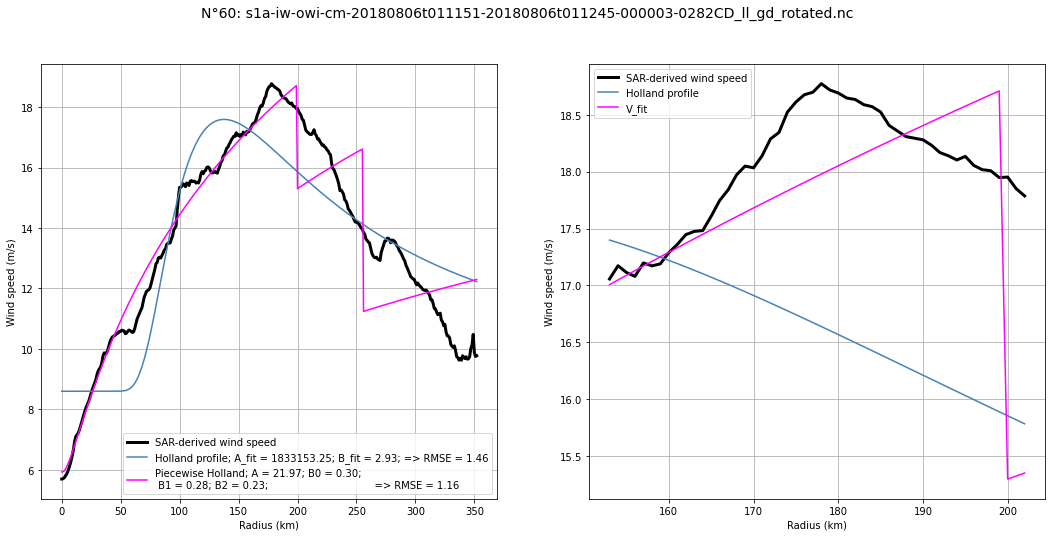

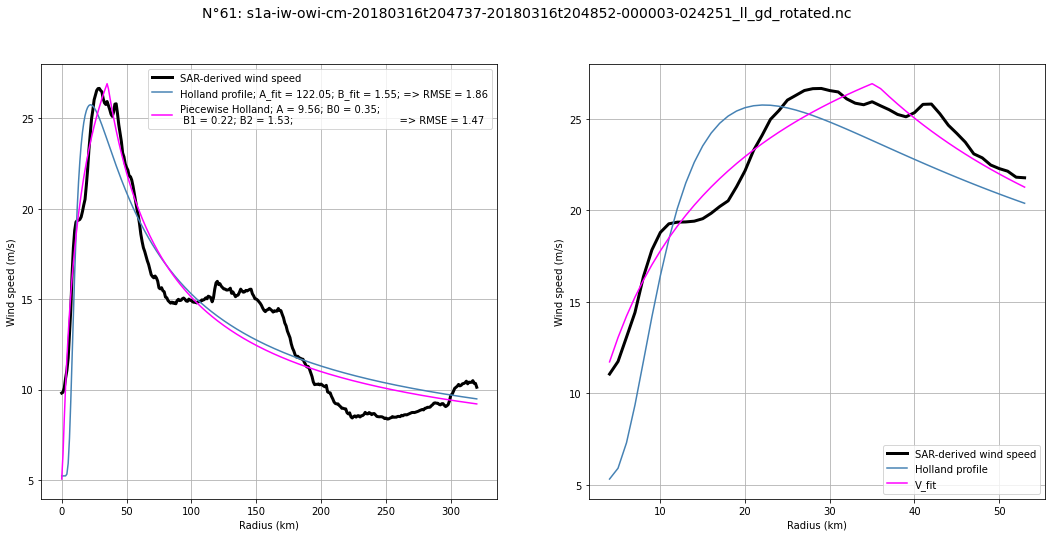

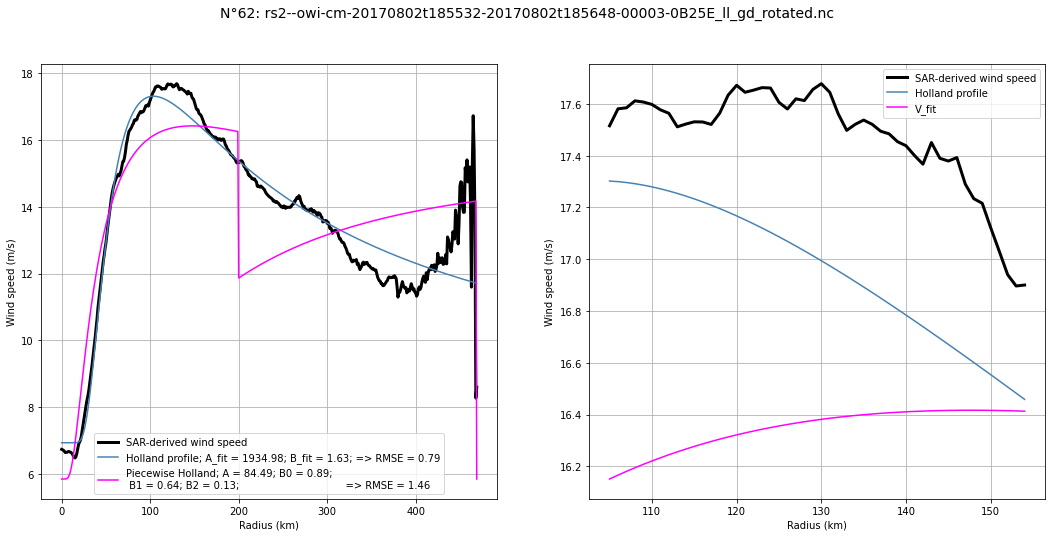

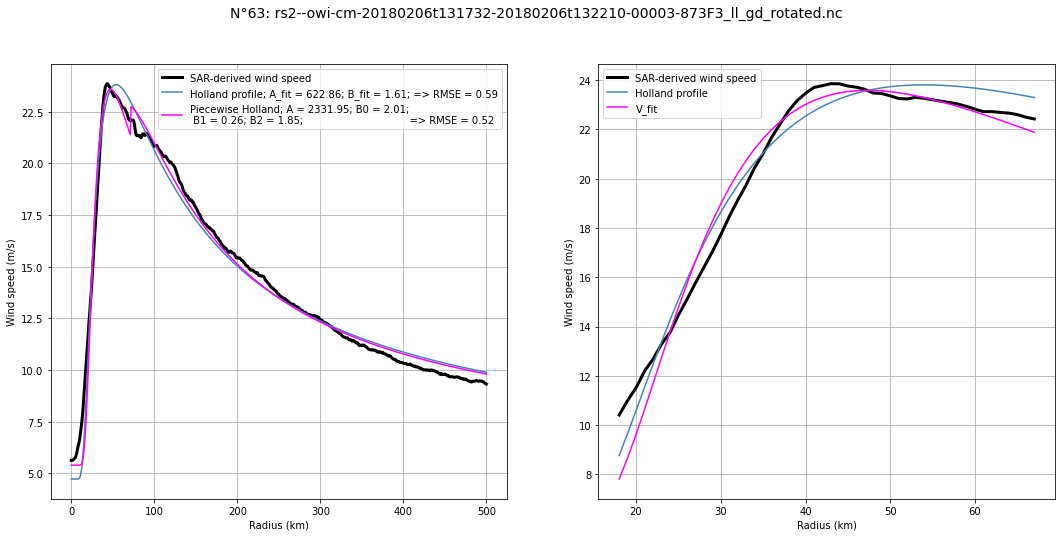

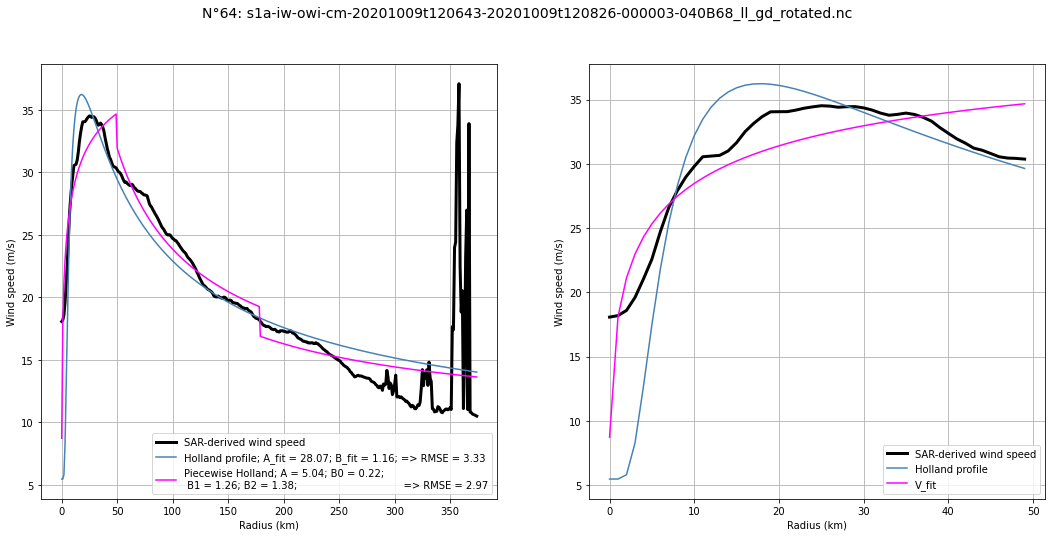

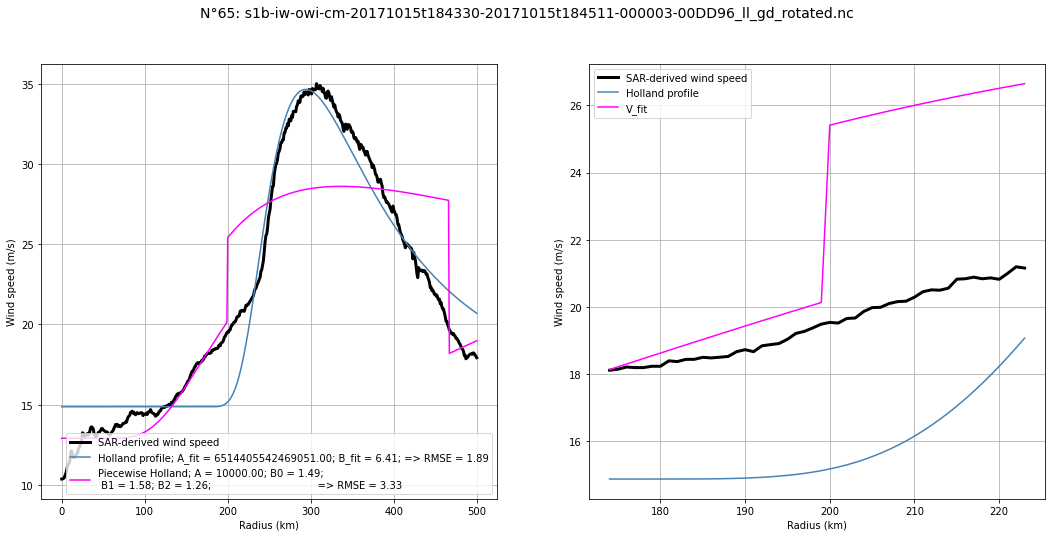

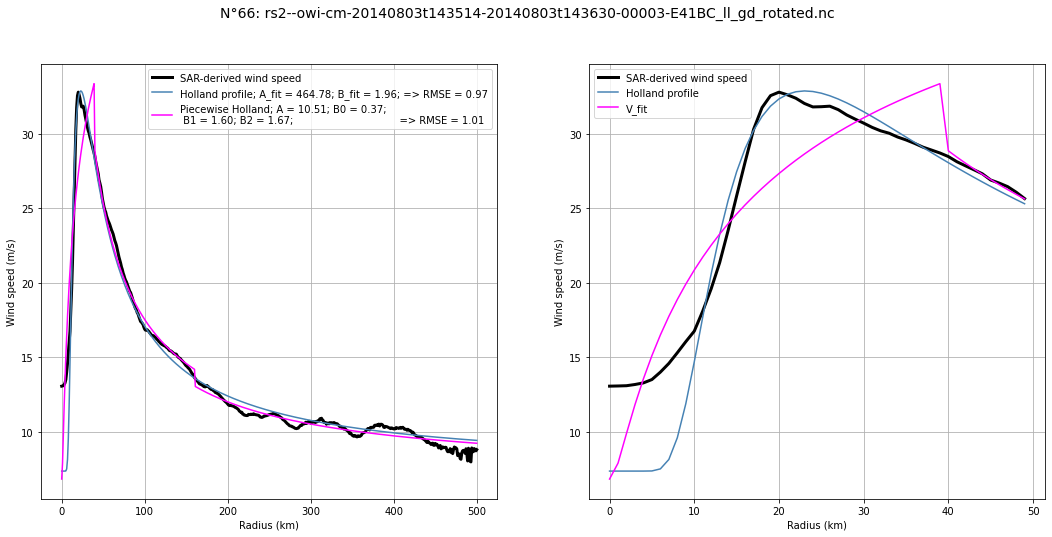

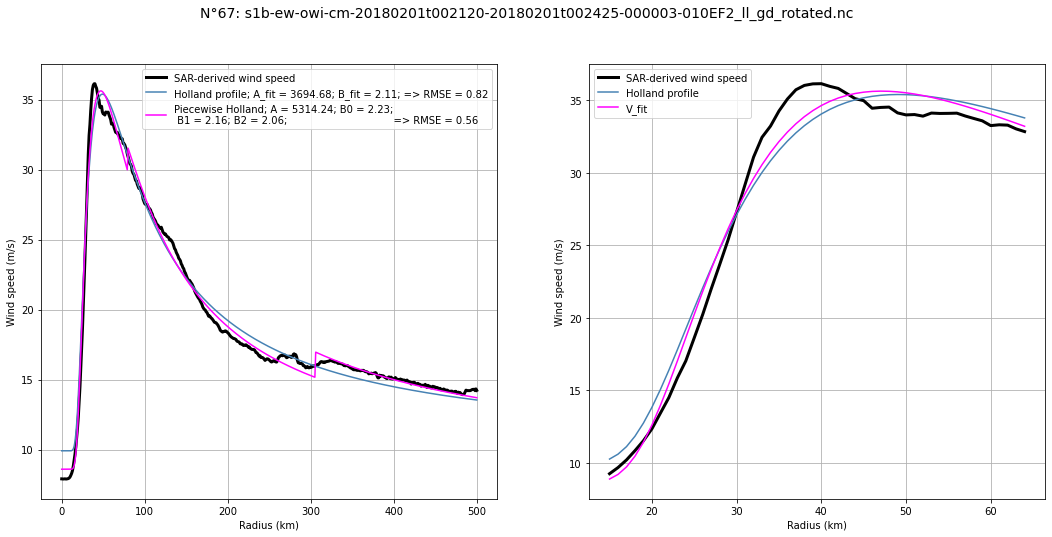

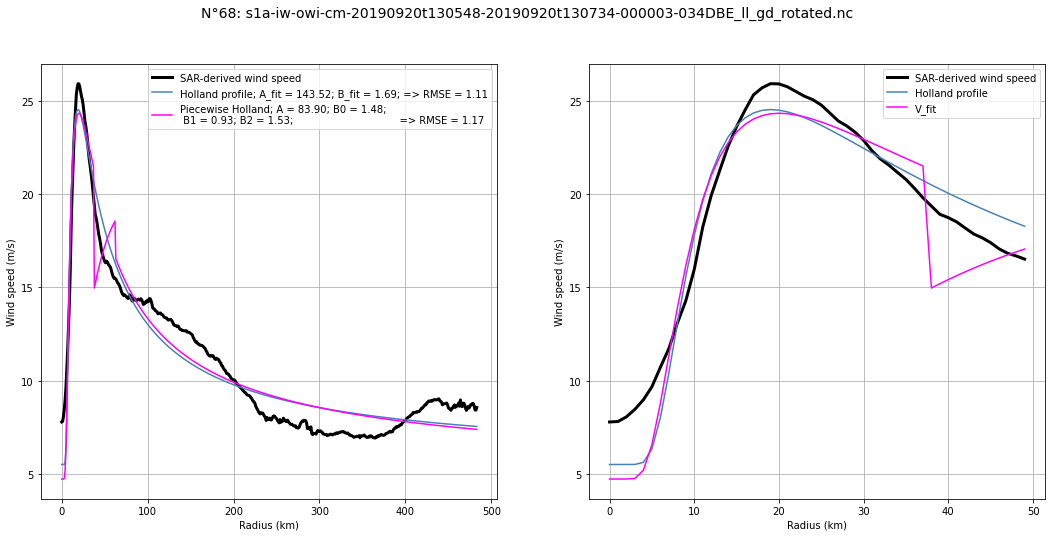

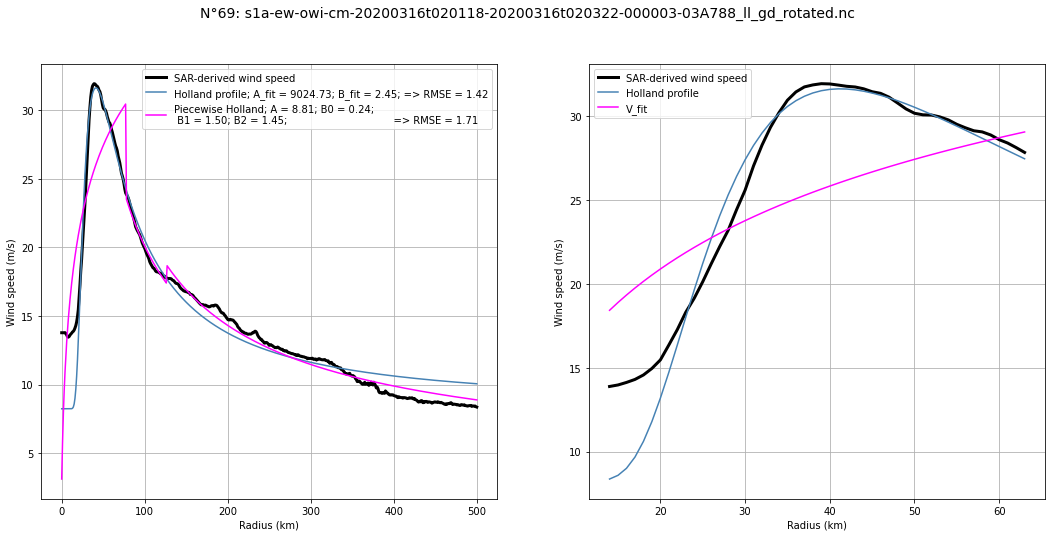

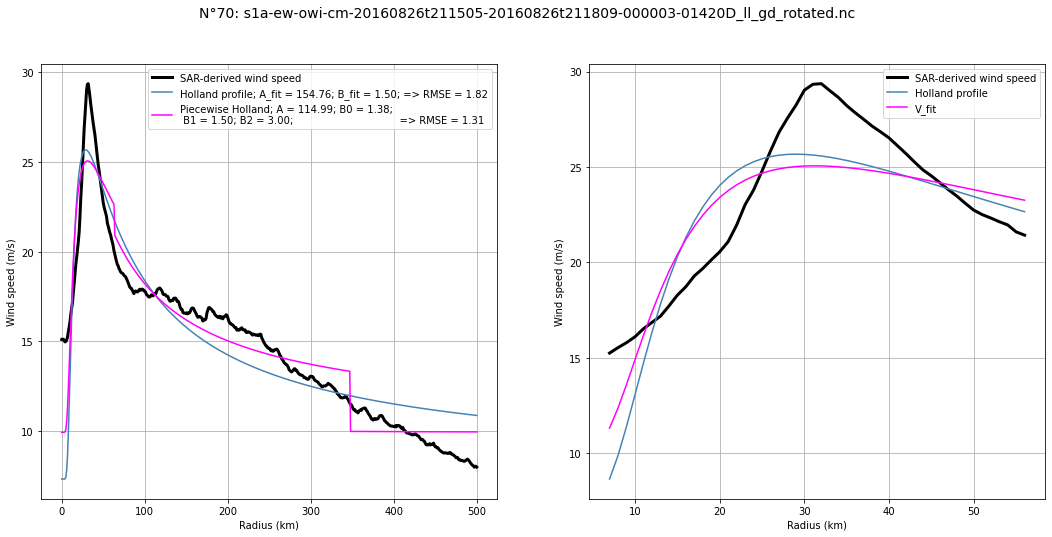

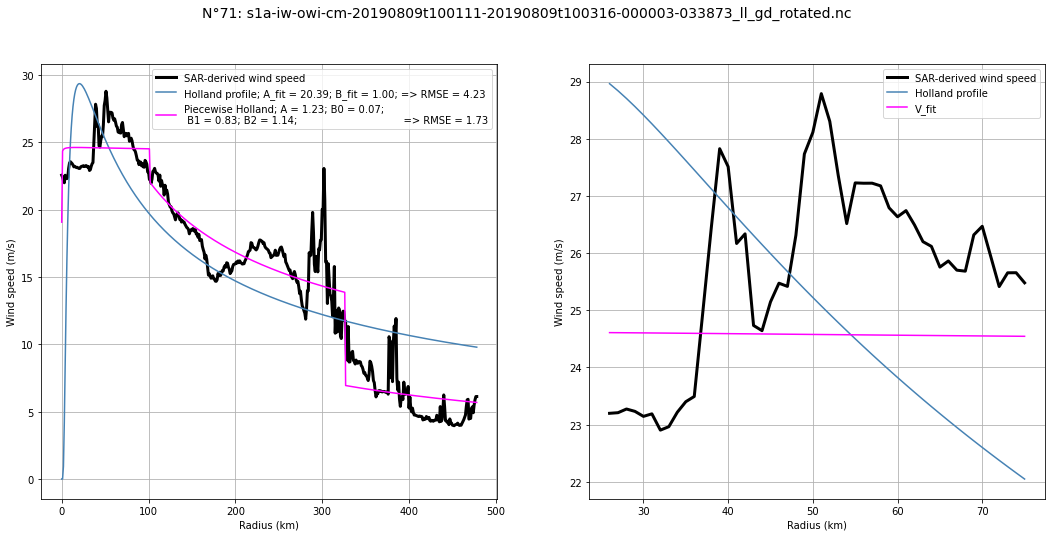

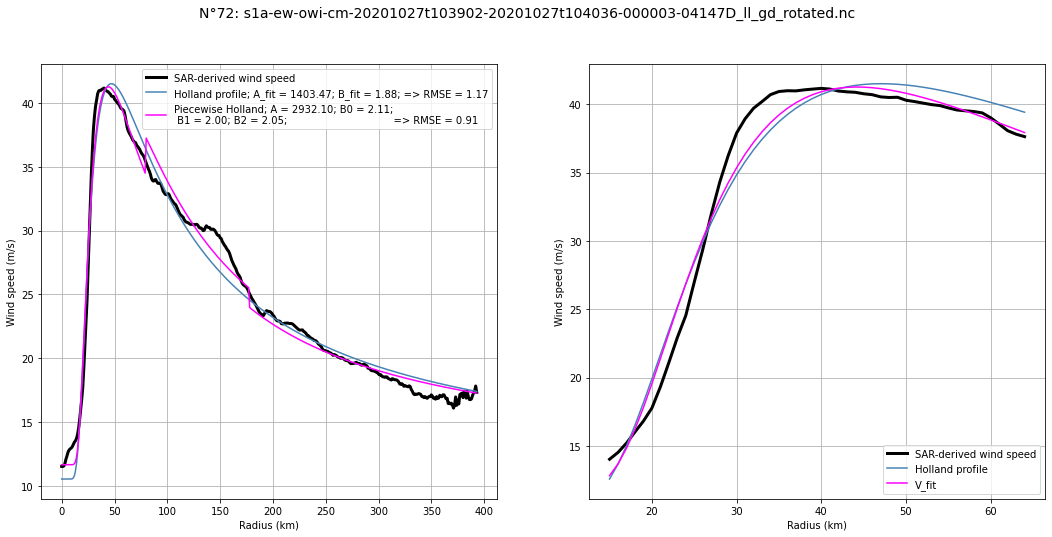

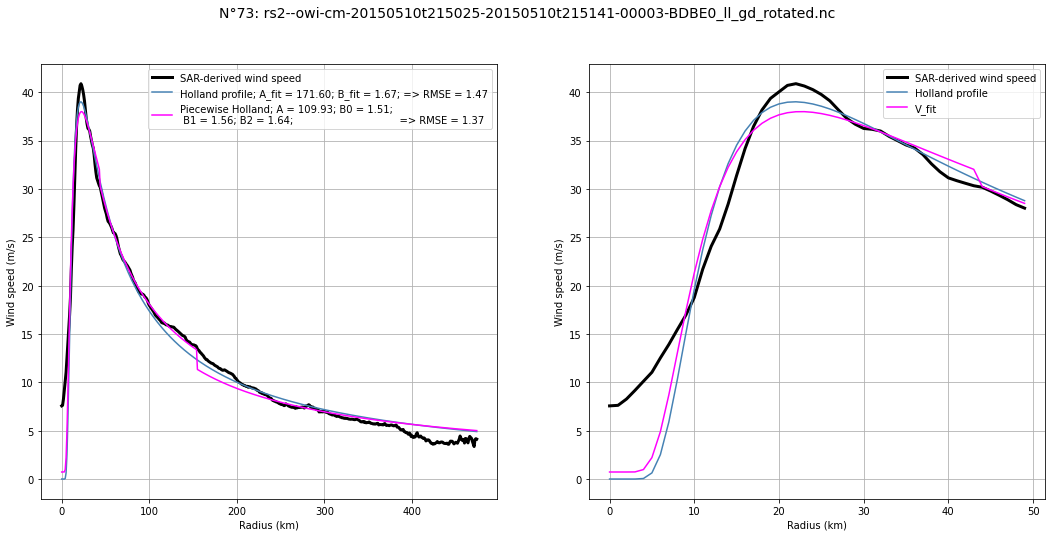

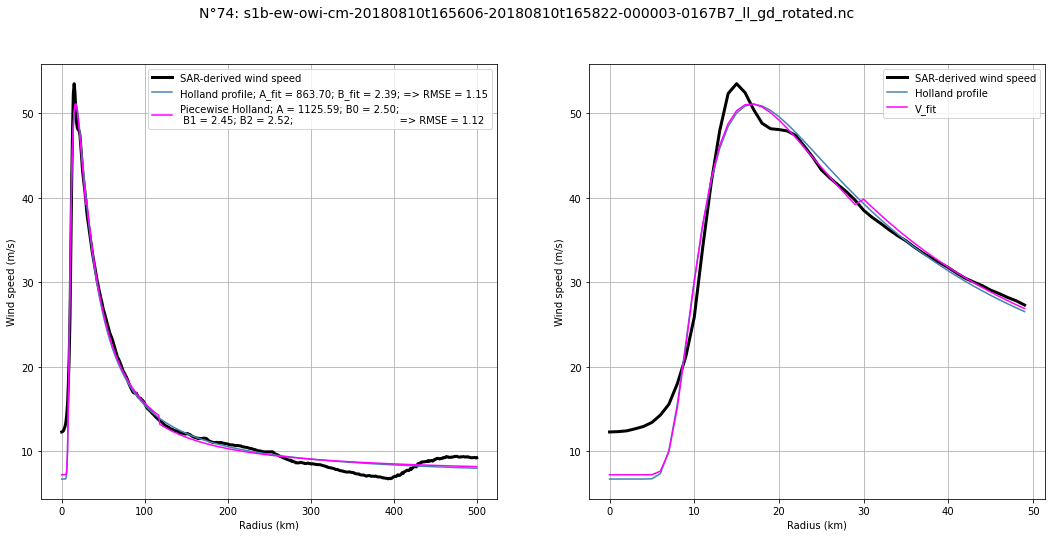

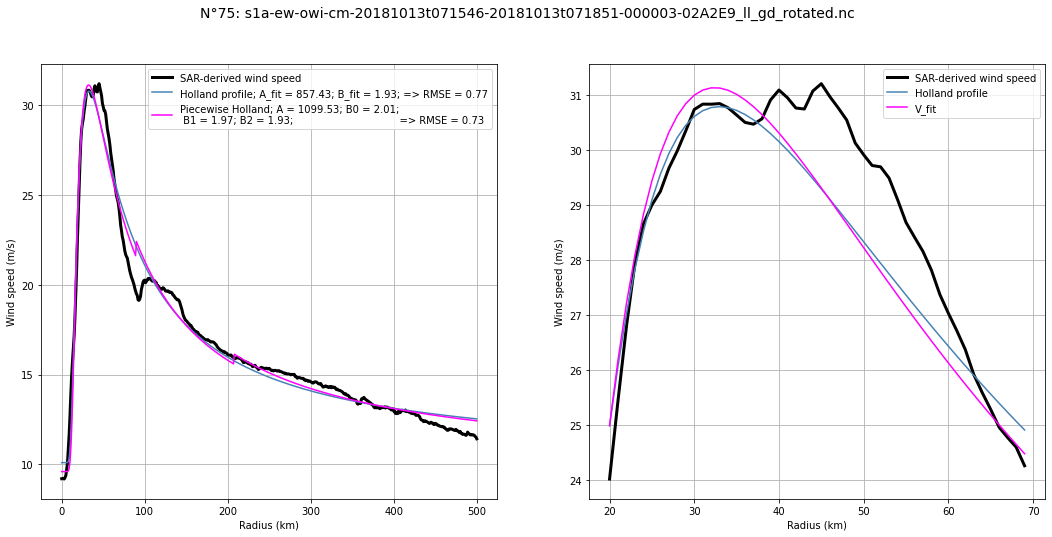

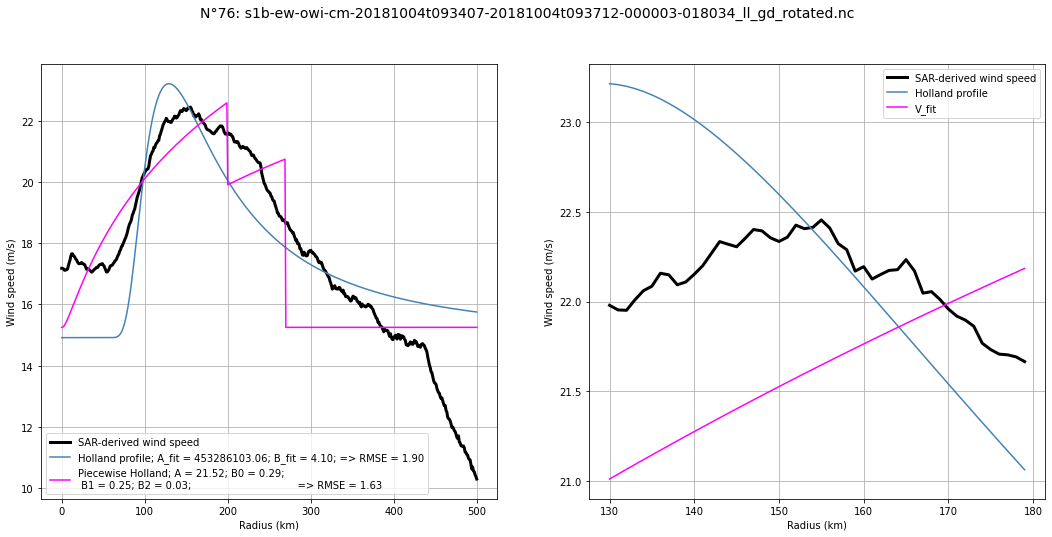

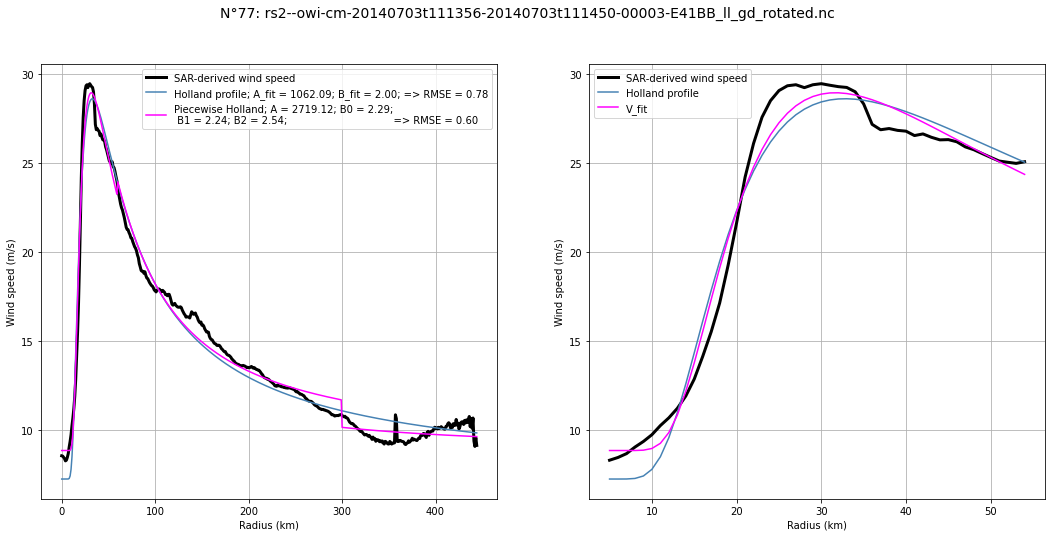

In [4]:
### SORT THE TCs BY CATEGORY
i = 35 
for file in all_data[i:100]:
    i += 1
    print(i, "=>    ", file)
    # Open file and compute mean wind speed
    ds   = xr.open_dataset(file)
    # print(ds['current_category'])
    spdm    = f.compute_mean_wind_spd(ds, 501)
    
    # Initialize and fit profile
    r, spdm       = f.initialize_radius(spdm)
    
    # INI['Chavas'] = f.initialize_chavas(spdm, Lat=np.float64(ds['lat_ref']),                   print_values=PARAMS['print_params_values']) # change to spdm_ch to use tangential wind speed
    # FIT['Chavas'] = f.fit_chavas(*INI['Chavas'],                            print_values=PARAMS['print_params_values'])
    
    INI['B_sens'] = f.initialize_B_sensitivity_experiment(spdm, power_law=3, rho=1.15, Lat=ds['lat_ref'], pn=1005 * 100., pc=950 * 100., print_values=PARAMS['print_params_values'])
    # INI['B_sens'] = list(INI['B_sens'])
    # INI['B_sens'][5] = FIT['Chavas'][5] # Use Rmerge as R2
    INI['Holland']= f.initialize_holland(spdm, Lat=np.float64(ds['lat_ref']), pn=1005, pc=950, print_values=PARAMS['print_params_values'])
    
    FIT['B_sens'] = f.fit_B_sensitivity_experiment(r, spdm, *INI['B_sens'], print_values=PARAMS['print_params_values'])
    FIT['Holland']= f.fit_holland(r, spdm, *INI['Holland'],                 print_values=PARAMS['print_params_values'])
    
        
    f.plot_B_sensitivity_experiment(i, file, r, spdm, INI, FIT)
    
   
    